# 3. Exercise solutions

# Exercise 1

In [1]:
def circle_area(r):
    '''Return circle area'''
    return pi * r**2 / 4 


# Import pi from the math library
from math import pi

# Test function with input with r=20, save returned value
A20 = circle_area(r=20)

# Print the result
print(A20)

314.1592653589793


* **Note**: Calling the funtion as `circle_area(20)` and `circle_area(r=20)` is the same.

# Exercise 2

In [2]:
def circle_areas(radii):
    # Use list comprehension to return a list of radii
    return [circle_area(r) for r in radii]


# Define list of radii
list_of_radii = [10, 12, 16, 20, 25, 32]

# Call function with input list
print(circle_areas(list_of_radii))

[78.53981633974483, 113.09733552923255, 201.06192982974676, 314.1592653589793, 490.8738521234052, 804.247719318987]


* **Note 1:** Call to function `circle_area` defined in Exercise instead of defining the expression `pi * r**2 / 4` again. The concept of functions calling other functions can be used to make modular programs that are easy to follow and maintain. Each function only needs to do a small thing in itself.

* **Note 2:** The input parameter when the function was *defined* was a list called `radii`, but when the function was *called*, the input list was called `list_of_radii`. Thus, the input parameters passed into a function do not need to have the same name as when the function is defined.

# Exercise 3

In [3]:
def is_pile_long(pile_lengths):
    
    # Create True or False value by list comprehension with if/else
    return [True if length >= 5 else False for length in pile_lengths]


# Define a list of some pile lengths to test
piles = [4.51, 6.12, 4.15, 7.31, 5.01, 4.99, 5.00]

# Call function 
print(is_pile_long(piles))

[False, True, False, True, True, False, True]


* **Note:** The built-in boolean values `True` and `False` *must* be capitalized to be recognized by Python. If for example `true` is used, Python will assume that it is a variable that you have named `true` and give an error if it is not defined. All editors will highlight the special words recognized by Python, so if the editor does not highlight, it's a sign that something is wrong.

# Exercise 4

In [4]:
# Import sqrt from the math library
from math import sqrt


def dist_point_to_line(x, y, x1, y1, x2, y2):
    '''Return distance between a point and a line defined by two points.

    Args:
        x  : x-coordinate of point 
        y  : y-coordinate of point
        x1 : x-coordinate of point 1 defining the line
        y1 : y-coordinate of point 1 defining the line
        x2 : x-coordinate of point 2 defining the line
        y2 : y-coordinate of point 2 defining the line

    Returns:
           The distance between the point and the line        
    '''
    return abs( (y2 - y1) * x - (x2 - x1) * y + x2 * y1 - x1 * y2) / sqrt((x2 - x1)**2 + (y2 - y1)**2)


# Call the function with the two test cases
print(dist_point_to_line(2, 1, 5, 5, 1, 6))
print(dist_point_to_line(1.4, 5.2, 10.1, 2.24, 34.142, 13.51))

4.608176875690327
6.3728037317960675


* **Note:** `abs()` used to get the numerical value.

# Exercise 5


In [5]:
# Two points defining the line
x1, y1, x2, y2 = 2, 3, 8, 7

# Define points for distance to line calculation
x_coords = [4.1, 22.2, 7.7, 62.2, 7.8, 1.1]
y_coords = [0.3, 51.2, 3.5, 12.6, 2.7, 9.8]

# Call function dist_point_to_line for all (x, y) points
distances = [dist_point_to_line(x_coords[i], y_coords[i], x1, y1, x2, y2) for i in range(len(x_coords))]

# Print new list
print(distances)

[3.4114062067851583, 28.899880223334442, 2.745765971314884, 25.405268987115498, 3.466876226407682, 6.157172178100044]


A way that is more Pythonic than the above is using `zip`, which takes the two coordinate lists and puts 
them side by side, almost like a zipper. It is often more clean and expressive than using a loop counter `i` over the length of one of the lists.

In [6]:
# Solution using zip
distances_zip = [dist_point_to_line(x, y, x1, y1, x2, y2) for x, y in zip(x_coords, y_coords)]
print(distances_zip)

[3.4114062067851583, 28.899880223334442, 2.745765971314884, 25.405268987115498, 3.466876226407682, 6.157172178100044]


In [7]:
# Results rounded to two decimals using the round() function
print([round(dist, 2) for dist in distances])

[3.41, 28.9, 2.75, 25.41, 3.47, 6.16]


# Exercise 6

In [8]:
def polygon_area(xv, yv, signed=False):
    ''' Return the area of a non-self-intersecting polygon given the coordinates of its vertices'''

    # Perform shoelace multiplication
    a1 = [xv[i] * yv[i+1] for i in range(len(xv)-1)]
    a2 = [yv[i] * xv[i+1] for i in range(len(yv)-1)]

    # Check if area should be signed and return area
    if signed:          # <--- Same as "if signed == True:"
        return 1/2 * ( sum(a1) - sum(a2) )
    else:
        return 1/2 * abs( sum(a1) - sum(a2) )


# Define the polygon vertices to test
x = [3, 4, 7, 8, 8.5, 3]
y = [5, 3, 0, 1, 3, 5]

# Calculate area by calling the function
A = polygon_area(x, y)

# Print the area
print(A)

12.0


# Exercise 7

In [9]:
def polygon_centroid(x, y):

    # Initialize empty lists for holding summation terms
    cx, cy = [], []
    
    # Loop over vertices and put the summation terms in the lists
    for i in range(len(x)-1):
        
        # Compute and append summation terms to each list
        cx.append((x[i] + x[i+1]) * (x[i] * y[i+1] - x[i+1] * y[i]))
        cy.append((y[i] + y[i+1]) * (x[i] * y[i+1] - x[i+1] * y[i]))

    # Calculate the signed polygon area by calling already defined function
    A = polygon_area(x, y, signed=True)    
        
    # Sum summation terms and divide by 6A to get coordinates
    Cx = sum(cx) / (6*A)
    Cy = sum(cy) / (6*A)
    
    return Cx, Cy    


# Define lists of vertex coordinates for testing
x = [3, 4, 7, 8, 8.5, 3]
y = [5, 3, 0, 1, 3, 5]

# Compute centroid by calling function, store in two variables
cx, cy = polygon_centroid(x, y)

# Print result
print(cx, cy)

6.083333333333333 2.5833333333333335


In [10]:
# Print result as text with formatted decimals
print(f'Polygon centroid is at (Cx, Cy) = ({cx:.1f}, {cy:.1f})')

Polygon centroid is at (Cx, Cy) = (6.1, 2.6)


# Appetizer for next time - Plotting

### Plotting the solution for the polygon centroid exercise:

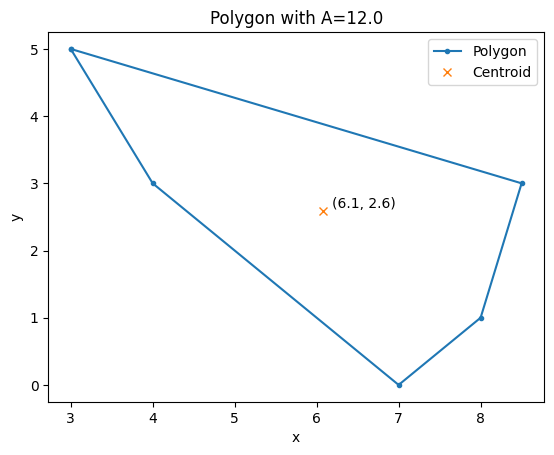

In [11]:
import matplotlib.pyplot as plt

# Plot polygon from exercises with centroid and area
plt.plot(x, y, '.-', label='Polygon')
plt.plot(cx, cy, 'x', label='Centroid')

# Plot coordinates of centroid as text
plt.annotate(f'({cx:.1f}, {cy:.1f})', xy=(cx, cy),
             xytext=(cx, cy), textcoords='offset points')

# Set labels, titles and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Polygon with A={A}')
plt.legend()
plt.show()

### Function for plotting an arbitrary polygon
The plotting code above could be turned into a function to plot an arbitrary polygon together with its center of gravity and put its area in the title:    

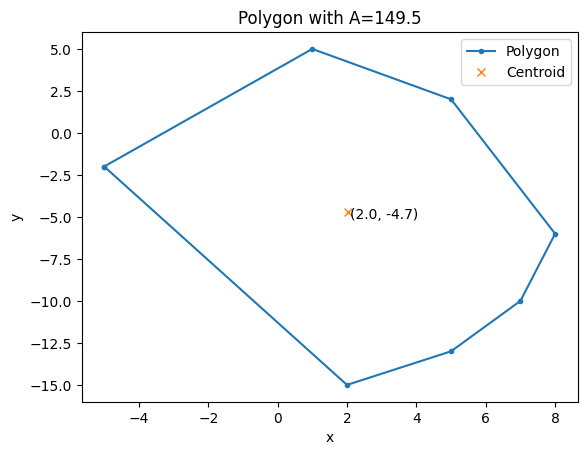

In [12]:

def plot_polygon(xv, yv, plot_centroid=True):   
    '''Plot the polygon with the specified vertex coordinates. 
    
    The plot is created with legend and the computed area of the 
    polygon shown in the title. The plot shows the centroid of 
    the polygon by default, but this can be turned off by setting 
    plot_centroid=False.
    
    Args:
        xv (list)            : x-coordinates of polygon vertices
        yv (list)            : y-coordinates of polygon vertices
        plot_centroid (bool) : Plot centroid of polygon (Cx, Cy).
                               Defaults to plotting the centroid.  
    '''
    
    # Compute area of polygon
    A = polygon_area(xv, yv)
    
    # Compute polygon centroid
    cx, cy = polygon_centroid(xv, yv)
    
    # Plot the polygon
    plt.plot(xv, yv, '.-', label='Polygon')
    
    # Plot the centroid with coordinates if that was chosen
    if plot_centroid:   # <- Eqiuvalent to: if plot_centroid == True:
        plt.plot(cx, cy, 'x', label='Centroid')
        plt.annotate(f'({cx:.1f}, {cy:.1f})', xy=(cx, cy),
                     xytext=(cx, cy), textcoords='offset points')
    
    # Set labels, titles and legend
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polygon with A={A}')
    plt.legend()
    plt.show()
    
    
# Define vertices of some random polygon
x_polygon = [-5, 2, 5, 7, 8, 5, 1, -5]
y_polygon = [-2, -15, -13, -10, -6, 2, 5, -2]

# Call function to plot polygon with area and centroid shown
plot_polygon(x_polygon, y_polygon)


* **Note 1:** Optional input parameter `plot_centroid` has `True` as default argument. `True` is immutable.
* **Note 2:** The area of the polygon is actually calculated both in the `polygon_area()` function and in the `polygon_centroid()` function, which is maybe not so clean. A way to overcome this could be to have `polygon_centroid()` return the area. Thereby running the `polygon_area()`function alone would not be necessary.

# End of exercises

*The cell below is for setting the style of this document. It's not part of the exercises.*

In [13]:
from IPython.display import HTML
HTML('<style>{}</style>'.format(open('../css/cowi.css').read()))